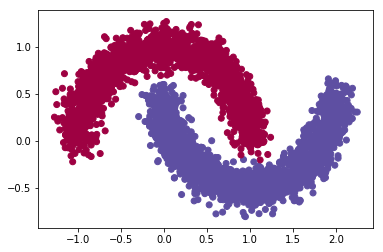

In [23]:
# Generating data for excerise

# 一定数量的例子和噪音
import sklearn.datasets
import numpy as np
import pylab
import theano 
import downhill
from theano import tensor as T
train_X, train_y = sklearn.datasets.make_moons(5000, noise=0.1)

# one hot encode the target values
train_y_onehot = np.eye(2)[train_y]

# plot the data
pylab.scatter(train_X[:-1000, 0], train_X[:-1000, 1], c=train_y[:-1000], cmap=pylab.
cm.Spectral)
pylab.show()

In [24]:
# Defining the loss function
# Set Seed 
np.random.seed(0)

num_examples = len(train_X)

# Oue Neural Network
nn_input_dim = 2
nn_hdim = 1000
nn_output_dim = 2

# Regularization
reg_lambda = np.float64(0.01)

# Weights and bias terms
W1_val = np.random.randn(nn_input_dim,nn_hdim)
b1_val = np.zeros(nn_hdim)
W2_val = np.random.randn(nn_hdim,nn_output_dim)
b2_val = np.zeros(nn_output_dim)

y = T.matrix('X')
W1 = theano.shared(W1_val,name='W1')
b1 = theano.shared(b1_val,name='b1')
W2 = theano.shared(W2_val,name='W2')
b2 = theano.shared(b2_val,name='b2')

batch_size = 1

# Our loss function
z1 = X.dot(W1) + b1
a1 = T.tan(z1)
z2 = a1.dot(W2) + b2
y_hat = T.nnet.softmax(z2)
loss_reg = 1./batch_size * reg_lambda/2 * (T.sum(T.sqr(W1)) + T.sum(T.sqr(W2)))
loss = T.nnet.categorical_crossentropy(y_hat,y).mean() + loss_reg

prediction = T.argmax(y_hat,axis=1)
predict = theano.function([X],prediction)

In [41]:
# SGD

# 存储训练集和验证集的损失
train_loss = []
validation_loss = []
opt = downhill.build('sgd', loss=loss)
#Set up training and validation dataset splits, use only one example in a batch #and use
# only one batch per step/epoc


#Use everything except last 1000 examples for training
train = downhill.Dataset([train_X[:-1000], train_y_onehot[:-1000]], batch_size=batch_size,
iteration_size=1)
#Use last 1000 examples for valudation
valid = downhill.Dataset([train_X[-1000:], train_y_onehot[-1000:]])

# SGD
iterations = 0
for tm,vm in opt.iterate(train,valid,patience=10000):
    iterations += 1
    
    # 记录训练集合验证集的损失
    train_loss.append(tm['loss'])
    validation_loss.append(vm['loss'])
    
if iterations > 10000:
    break

UnsupportedOperation: not writable